In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import math

In [121]:
jmax=nx=50
imax=ny=200

x = np.linspace(0, 10, nx)
y = np.linspace(0, 10, ny)
xv, yv = np.meshgrid(x, y)
yv = yv[::-1]
print(yv[0])
print(len(yv[0]))


[10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
50


In [122]:
print(nx)
print(ny)

50
200


In [123]:
for i in range(1, len(yv)):
    yv[i] = np.zeros_like(yv[i])
Psi = yv

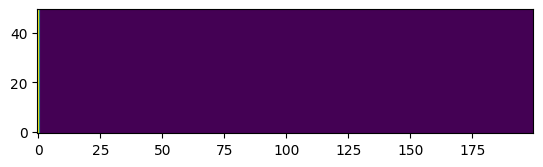

In [124]:
plt.imshow(yv.T, origin='lower')

In [125]:
# Initialize the average residual high to enter the loop
residave = 1000.0
# Counter for iterations
cnt=0
# Coefficients for the Jacobi iteration - in the context of a Laplace equation, these would be related to the discretization
a=1.0; b=1.0; c=1.0; d=1.0; e=-4.0; f=0.0

# Copy of the Psi array to keep the old values during iteration
Psi_old = copy(Psi)

# Loop until the average residual is less than the convergence criterion
while residave>1.0e-5:#6
    # Initialize total of the norms and residuals for this iteration
    norm_tot=0
    residtot=0.0
    # Loop over the internal grid points, skipping the boundaries
    for i in range(1,imax-1,1):
        for j in range(0,jmax-1,1):
            # Calculate the new value of Psi at position (i, j) based on the old values around it
            # This is the Jacobi update, using a five-point stencil
            Psi[i,j] = (f-(a*Psi_old[i+1,j]+b*Psi_old[i-1,j]+c*Psi_old[i,j+1]+d*Psi_old[i,j-1]))/e
            # Accumulate the absolute value of the new Psi for the norm
            norm_tot += abs(Psi[i,j])
            # Accumulate the absolute value of the difference between the old and new Psi for the residual
            residtot += abs(Psi_old[i,j]-Psi[i,j])
    
    # Calculate the average residual for this iteration
    residave = residtot / maximum(norm_tot,1.0e-10)
    # Increment the iteration counter
    cnt+=1
    # Swap Psi and Psi_old arrays to prepare for the next iteration
    # This avoids having to make a full copy of the array, which saves time and memory
    temp = Psi
    Psi = Psi_old
    Psi_old = temp
    
    # Print the average residual every 100 iterations to monitor convergence
    if cnt%100==0:
        print("%g: resid=%f" % (cnt,residave))

100: resid=0.004816
200: resid=0.002181
300: resid=0.001344
400: resid=0.000938
500: resid=0.000699
600: resid=0.000543
700: resid=0.000434
800: resid=0.000353
900: resid=0.000292
1000: resid=0.000245
1100: resid=0.000207
1200: resid=0.000176
1300: resid=0.000151
1400: resid=0.000130
1500: resid=0.000112
1600: resid=0.000097
1700: resid=0.000085
1800: resid=0.000074
1900: resid=0.000065
2000: resid=0.000057
2100: resid=0.000050
2200: resid=0.000044
2300: resid=0.000039
2400: resid=0.000034
2500: resid=0.000030
2600: resid=0.000027
2700: resid=0.000024
2800: resid=0.000021
2900: resid=0.000019
3000: resid=0.000017
3100: resid=0.000015
3200: resid=0.000013
3300: resid=0.000012
3400: resid=0.000011


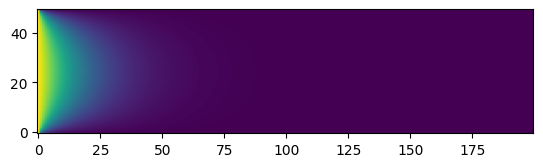

In [126]:
plt.imshow(Psi.T, origin='lower')

In [132]:
fx=zeros((imax,jmax))
fy=zeros((imax,jmax))

for i in range(0,imax,1):
    for j in range(0,jmax,1):
        if j>0 and j<jmax-1:
            fx[i,j]=(Psi[i,j+1]-Psi[i,j-1])/(2.*dx)
        elif j>0:
            fx[i,j]=(Psi[i,j]-Psi[i,j-1])/dx
        else:
            fx[i,j]=(Psi[i,j+1]-Psi[i,j])/dx
            
        if i>0 and i<imax-1:
            fy[i,j]=-(Psi[i+1,j]-Psi[i-1,j])/(2.*dx)
        elif i>0:
            fy[i,j]=-(Psi[i,j]-Psi[i-1,j])/dx
        else:
            fy[i,j]=-(Psi[i+1,j]-Psi[i,j])/dx
        

In [139]:
dx = y[1]
dx

0.05025125628140704

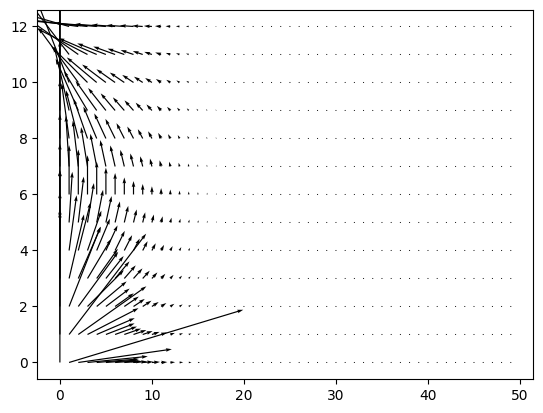

In [138]:
stride = 4
quiver(fx.transpose()[::stride,::stride],fy.transpose()[::stride,::stride])